# Защита данных клиентов страховой компании

# Оглавление


## Описание проекта

Защита данных клиентов страховой компании. Разработка метода преобразования данных, по которым сложно восстановить персональные данные.

## Цель проекта

Разработать метод, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## План проекта

1. Загрузка и изучение данных.

 1.1 Загрузка данных

 2.1 Изучение данных
 
    2.1.1 Предобработка данных
2. Ответ на вопрос

3. Алгоритм шифрования

 3.1 Программирование алгоритма

 3.2 Вывод

## Описание данных

- Признаки: персональные данные клиента
- Целевой признак: выплата клиенту за последние 5 лет.

# Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Загрузка данных 

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


## Изучение данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.duplicated().sum()

153

Пропущенных значений нет. Есть дубликаты

Проверим на корреляцию

<AxesSubplot:>

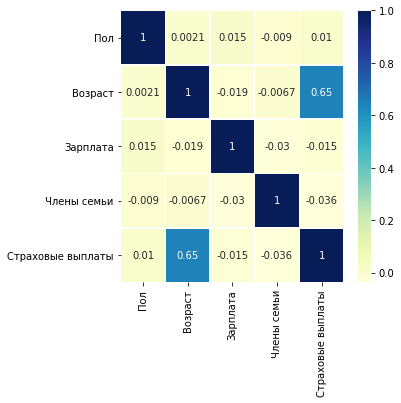

In [6]:
corr = df.corr()
plt.figure(figsize = (5,5))
sb.heatmap(corr,annot = True,linewidths=.5,cmap="YlGnBu")

Корреляция заметна только между выплатами и возрастом

### Предобработка данных

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

# Ответ на вопрос

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Умножим на матрицу Р:

$$
w1 = ((XP)^T XP)^{-1} (XP)^T y = (P^T (X^T X) P)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Дальше у нас $$(P^T)^{-1} P^T$$ сокращаются и получается эта формула:

$$
w1 = P^{-1}(X^T X)^{-1} X^T y
$$

Теперь подставим эту формулу в первую формулу и получим ответ:

$$
a = X * P*P^{-1}(X^T X)^{-1} X^T y 
$$

По правилам пребразования матриц наши матрицы P сокращаются и получаем нашу исходную формулу
Т.е ответ следующий:
 - Если умножим признаки на обратимую матрицу, качество линейной регрессии не поменяется

# Алгоритм шифрования

Алгоритм шифрования следующий:
1. Создадим случайную матрицу
2. Проверим ее на обратимость
3. Умножим на наши признаки
4. Найдем метрику обученной модели на исходных признаках
5. Найдем метрику обученной модели на признаках умноженных на нашу матрицу
6. Сравним метрики
7. Если они равно, то профит

## Программирование алгоритма

In [9]:
features = df.drop('Страховые выплаты', axis=1).values
target = df['Страховые выплаты']

Модель с исходными признаками

In [10]:
model_1 = LinearRegression().fit(features, target)
predictions_1 = model_1.predict(features)
print(r2_score(target, predictions_1))

0.4302010044852067


Создадим случайную матрицу

In [17]:
P = np.random.normal(1, 2, size=(4, 4)) 

In [18]:
P

array([[-2.91684623, -0.4009549 ,  2.21626171,  2.11953201],
       [-0.85880151,  0.0936065 , -2.16500846,  1.26779816],
       [ 2.22301043,  3.8354344 ,  0.92226873,  1.74913052],
       [ 0.51381683, -0.41581717, -0.70251444, -1.36526503]])

Проверим матрицу на обратимость

In [19]:
np.linalg.inv(P)

array([[-0.7955006 , -0.32004065, -0.28040965, -1.89143423],
       [ 0.69375807,  0.28149913,  0.54753995,  2.03993019],
       [ 0.03573331, -0.34081319, -0.01886383, -0.28517521],
       [-0.52907038, -0.03081325, -0.26258901, -1.91885751]])

Ошибки нет, значит наша матрица обратима

In [13]:
model_2 = LinearRegression().fit(features@P, target)
predictions_2 = model_2.predict(features@P)
print(r2_score(target, predictions_2))

0.43020100448520526


Видим, что разность метрик у двух моделей очень мала, поэтому будем считать, что они одинаковые

## Вывод

В данном проекте провели следующую работу: 
- немного предобработали данные;
- доказали, что если умножить признаки на обратимую матрицу, качество линейной регрессии не поменяется;
- предложили алгоритм шифрования и запрограммировали его;
- убедились в правильности работы нашего алгоритма.
